In [1]:
mode = "png"

import matplotlib

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [2]:
import numpy as np

# define the node names
node_names = np.array(["SI", "MH", "BK", "Q", "BX"])
# define the adjacency matrix
A = np.array([[0,0,1,0,0],  # Staten Island neighbors Brooklyn
              [0,0,1,1,1],  # Manhattan Neighbors all but Staten Island
              [1,1,0,0,0],  # Brooklyn neighbors Staten Island and Manhattan
              [0,1,0,0,1],  # Queens neighbors Manhattan and the Bronx
              [0,1,0,1,0]]) # the Bronx neighbors Manhattan and Queens

In [3]:
# compute the degree of each node
di = A.sum(axis=0)
# the probability matrix is the adjacency divided by
# degree of the starting node
P = (A / di).T

/Users/alex/mambaforge/envs/graphstatsbook/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


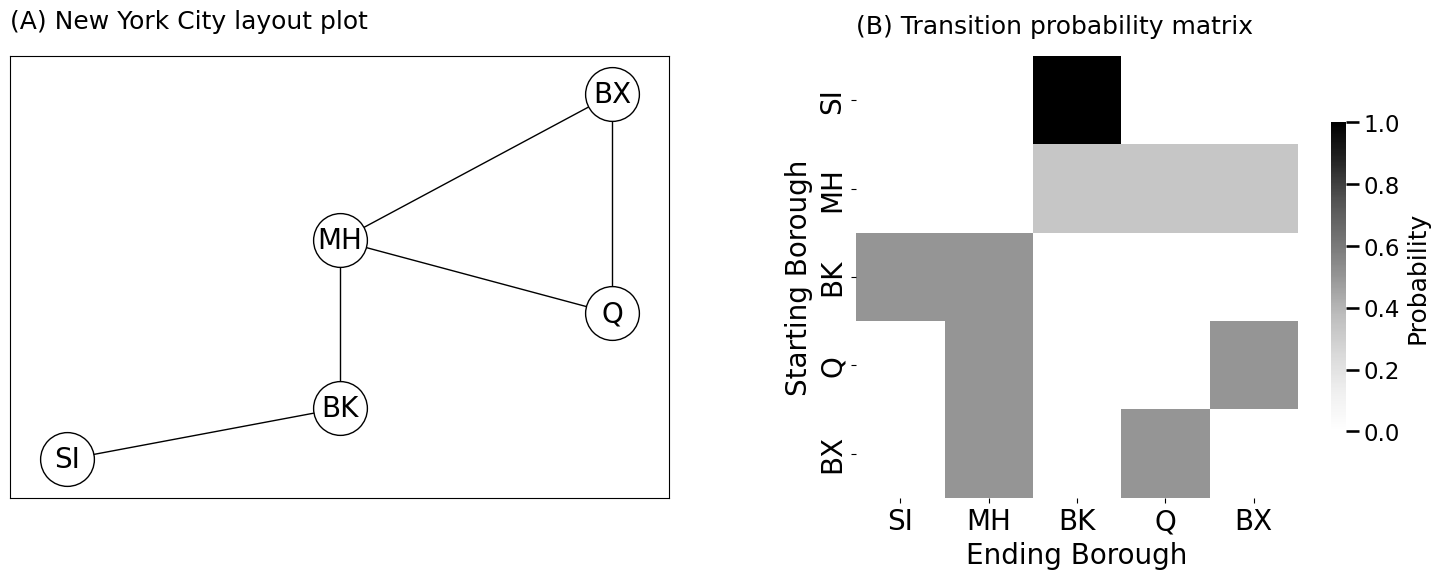

In [4]:
import networkx as nx
from graphbook_code import heatmap

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# create an undirected network G
G = nx.Graph()
# add the nodes like before
G.add_node("SI", pos=(2,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,1.7))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

# specify boroughs that are connected to one another
pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("Q", "BX")

# plotting
nx.draw_networkx(G, with_labels=True, node_color="white", pos=pos,
                 font_size=20, node_size=1500, font_color="black", arrows=False,
                 width=1, edgecolors="#000000", ax=axs[0])
axs[0].set_title("(A) New York City layout plot", pad=20, loc="left", fontsize=18)
heatmap(P, title="(B) Transition probability matrix", xtitle="Ending Borough", ytitle="Starting Borough",
        xticklabels=list(node_names), yticklabels=list(node_names), ax=axs[1], legend_title="Probability")
fig.tight_layout()

fname = "first_ord"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

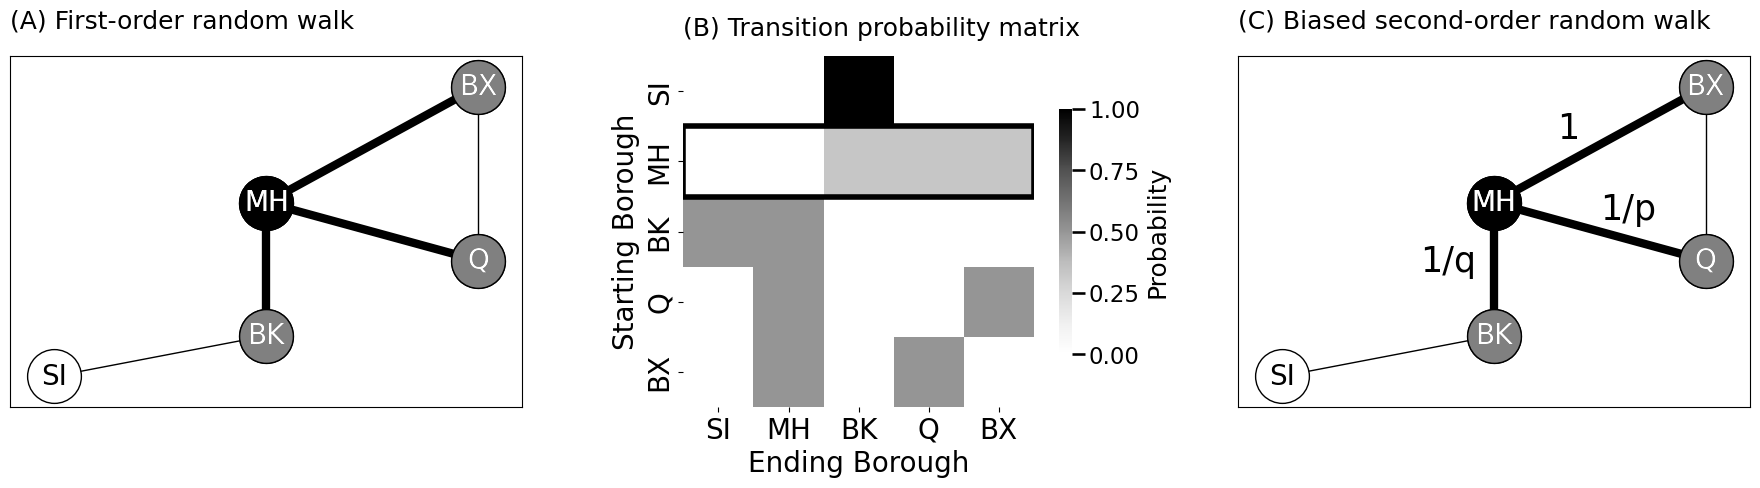

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={"width_ratios": [1, 1, 1]})

G2 = nx.Graph()
G2.add_node("MH", pos=(4,4))

G3 = nx.Graph()
G3.add_node("BK", pos=(4,1.7))
G3.add_node("Q", pos=(6,3))
G3.add_node("BX", pos=(6,6))
G3.add_edge("MH", "BK")
G3.add_edge("MH", "Q")
G3.add_edge("MH", "BX")

# plotting
nx.draw_networkx(G, with_labels=True, node_color="white", pos=pos,
                 font_size=20, node_size=1500, font_color="black", arrows=False,
                 width=1, edgecolors="#000000", ax=axs[0])
nx.draw_networkx(G3, with_labels=True, node_color="gray", pos=pos,
                 font_size=20, node_size=1500, font_color="white", arrows=False,
                 width=6, edgecolors="#000000", ax=axs[0])
nx.draw_networkx(G2, with_labels=True, node_color="black", pos=pos,
                 font_size=20, node_size=1500, font_color="white", arrows=False,
                 width=1, edgecolors="#000000", ax=axs[0])
axs[0].set_title("(A) First-order random walk", pad=20, loc="left", fontsize=18)

heatmap(P, title="(B) Transition probability matrix", xtitle="Ending Borough", ytitle="Starting Borough",
        xticklabels=list(node_names), yticklabels=list(node_names), ax=axs[1], legend_title="Probability")
axs[1].set_title("(B) Transition probability matrix", pad=15, fontsize=18, loc="left")
axs[1].add_patch(plt.Rectangle((0, 1), 5, 1, linewidth=4, edgecolor="black", facecolor="none"))

nx.draw_networkx(G, with_labels=True, node_color="white", pos=pos,
                 font_size=20, node_size=1500, font_color="black", arrows=False,
                 width=1, edgecolors="#000000", ax=axs[2])
nx.draw_networkx(G3, with_labels=True, node_color="gray", pos=pos,
                 font_size=20, node_size=1500, font_color="white", arrows=False,
                 width=6, edgecolors="#000000", ax=axs[2])
nx.draw_networkx(G2, with_labels=True, node_color="black", pos=pos,
                 font_size=20, node_size=1500, font_color="white", arrows=False,
                 width=1, edgecolors="#000000", ax=axs[2])
axs[2].set_title("(C) Biased second-order random walk", pad=20, loc="left", fontsize=18)
axs[2].annotate("1/q", xy=(3.3, 2.8), fontsize=25, color="black")
axs[2].annotate("1", xy=(4.6, 5.1), fontsize=25, color="black")
axs[2].annotate("1/p", xy=(5, 3.7), fontsize=25, color="black")

fig.tight_layout()

fname = "one_step"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [6]:
x0 = np.array([0,1,0,0,0])  # x vector indicating we start at MH
ps0 = P.T @ x0  # p vector for timestep 1 starting at node MH at time 0
# choose the next node using the probability vector we calculated
next_node = np.random.choice(range(0, len(node_names)), p=ps0)
print(f"Next node: {node_names[next_node]:s}")

Next node: Q


In [7]:
p = 5  # return parameter
q = 1/2  # in-out parameter
bias_vector = np.ones(len(node_names))
bias_vector[node_names == "Q"] = 1/p
bias_vector[node_names == "BK"] = 1/q

In [8]:
xtminus1 = [0, 0, 0, 1, 0]  # previous step was at Q
xt = [0, 1, 0, 0, 0]  # starting vector at MH
pst = P.T @ xt  # probability vector is Pt*x

In [9]:
bias_factors = pst*bias_vector

In [10]:
biased_pst = bias_factors/bias_factors.sum()

In [11]:
xt = np.array([0,1,0,0,0])  # x vector indicating we start at MH
# choose the next node using the second-order biased transition probability
next_node = np.random.choice(range(0, len(node_names)), p=biased_pst)
print(f"Next node: {node_names[next_node]:s}")

Next node: BX


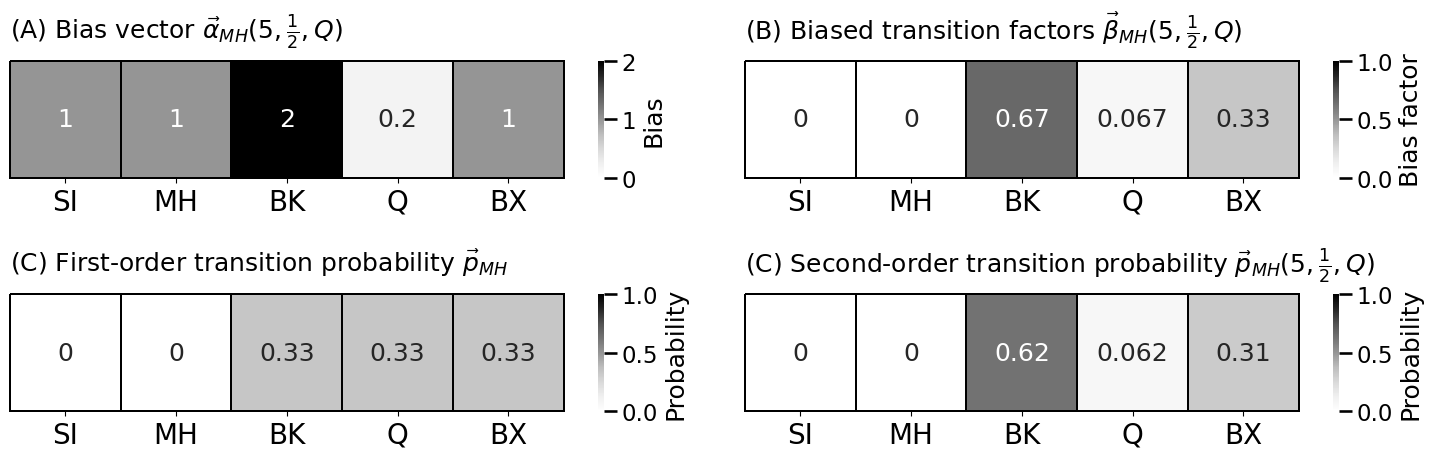

In [12]:
from graphbook_code import lpm_heatmap

fig, axs = plt.subplots(2, 2, figsize=(15, 5))

lpm_heatmap(bias_vector.reshape(1, -1), title="(A) Bias vector $\\vec{\\alpha}_{MH}(5, \\frac{1}{2}, Q)$",
            ax=axs[0][0], legend_title="Bias", vmin=0, vmax=2,
            xticks=[0.5, 1.5, 2.5, 3.5, 4.5], xticklabels=["SI", "MH", "BK", "Q", "BX"], shrink=1,
            annot=True, linewidths=0.05, linecolor="black", clip_on=False)
lpm_heatmap(bias_factors.reshape(1, -1), title="(B) Biased transition factors $\\vec{\\beta}_{MH}(5, \\frac{1}{2}, Q)$",
            ax=axs[0][1], legend_title="Bias factor", vmin=0, vmax=1,
            xticks=[0.5, 1.5, 2.5, 3.5, 4.5], xticklabels=["SI", "MH", "BK", "Q", "BX"], shrink=1,
            annot=True, linewidths=0.05, linecolor="black", clip_on=False)
lpm_heatmap(pst.reshape(1, -1), title="(C) First-order transition probability $\\vec{p}_{MH}$",
            ax=axs[1][0], legend_title="Probability", vmin=0, vmax=1,
            xticks=[0.5, 1.5, 2.5, 3.5, 4.5], xticklabels=["SI", "MH", "BK", "Q", "BX"], shrink=1,
            annot=True, linewidths=0.05, linecolor="black", clip_on=False)
lpm_heatmap(biased_pst.reshape(1, -1), title="(C) Second-order transition probability $\\vec{p}_{MH}(5, \\frac{1}{2}, Q)$",
            ax=axs[1][1], legend_title="Probability", vmin=0, vmax=1,
            xticks=[0.5, 1.5, 2.5, 3.5, 4.5], xticklabels=["SI", "MH", "BK", "Q", "BX"], shrink=1,
            annot=True, linewidths=0.05, linecolor="black", clip_on=False)

fig.tight_layout()

fname = "trans_vecs"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [13]:
from graphbook_code import dcsbm

nk = 50  # 50 nodes per community
zs = np.repeat([1, 2], nk)
B = np.array([[0.6, 0.2], [0.2, 0.6]])  # same probabilities as from SBM section
theta = b = np.repeat([1, .5, 1, .5], nk // 2)
deg_map = {1: "Core", 0.5: "Per."}

zs_deg = [f"{deg_map[theta[i]]:s}" for i in range(len(theta))]
zs_aug = [f"{z:d}, {deg:s}" for z, deg in zip(zs, zs_deg)]

A, P = dcsbm(zs, theta, B, return_prob=True)

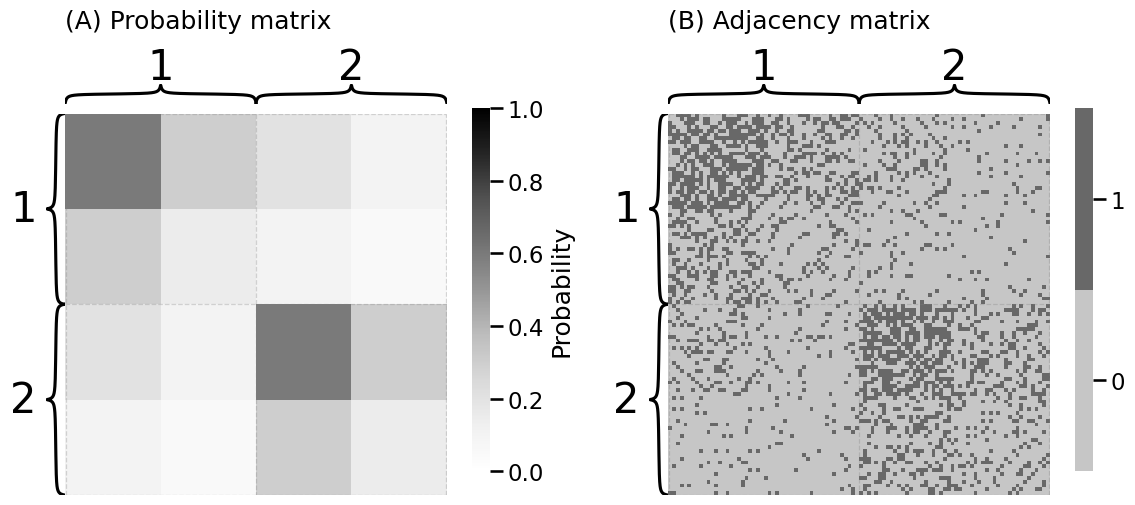

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(P, vmin=0, vmax=1, title="(A) Probability matrix", inner_hier_labels=zs, legend_title="Probability", ax=axs[0])
heatmap(A.astype(int), title="(B) Adjacency matrix", inner_hier_labels=zs, ax=axs[1])

fig.tight_layout()

fname = "diff_ex"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [15]:
from graspologic.embed import node2vec_embed
import networkx as nx
p=1; q=1/10; T=200; r=500
d = 4

Xhat1, _ = node2vec_embed(nx.from_numpy_array(A),
                         return_hyperparameter=float(p), inout_hyperparameter=float(q),
                         dimensions=d, num_walks=r, walk_length=T)

[]

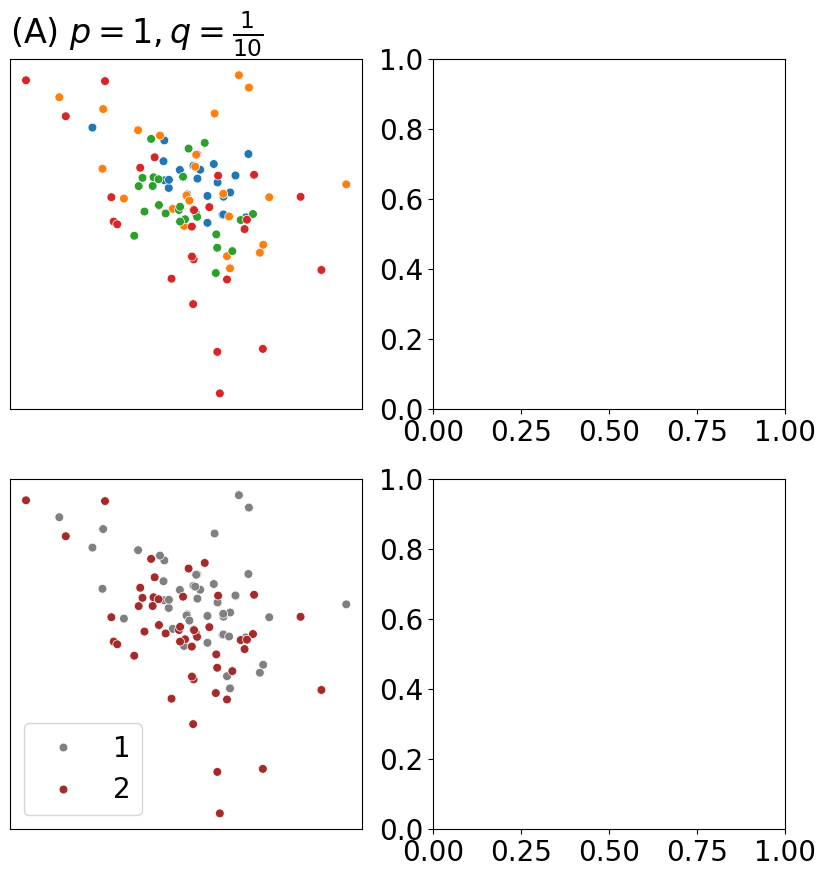

In [16]:
from graphbook_code import plot_latents

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plot_latents(Xhat1, ax=axs[0][0], s=40, labels=zs_aug, title="(A) $p = 1, q = \\frac{1}{10}$")
axs[0][0].get_legend().remove()
# Remove x and y ticks
axs[0][0].set_xticks([])
axs[0][0].set_yticks([])

# Remove axis numbers
axs[0][0].set_xticklabels([])
axs[0][0].set_yticklabels([])


plot_latents(Xhat1, ax=axs[1][0], s=40, labels=zs, title="", palette={1: "gray", 2: "brown"})
axs[1][0].set_xticks([])
axs[1][0].set_yticks([])

# Remove axis numbers
axs[1][0].set_xticklabels([])
axs[1][0].set_yticklabels([])

In [17]:
p=1; q=10; T=200; r=500
d = 4

Xhat2, _ = node2vec_embed(nx.from_numpy_array(A), return_hyperparameter=float(p), inout_hyperparameter=float(q),
                   dimensions=d, num_walks=r, walk_length=T)

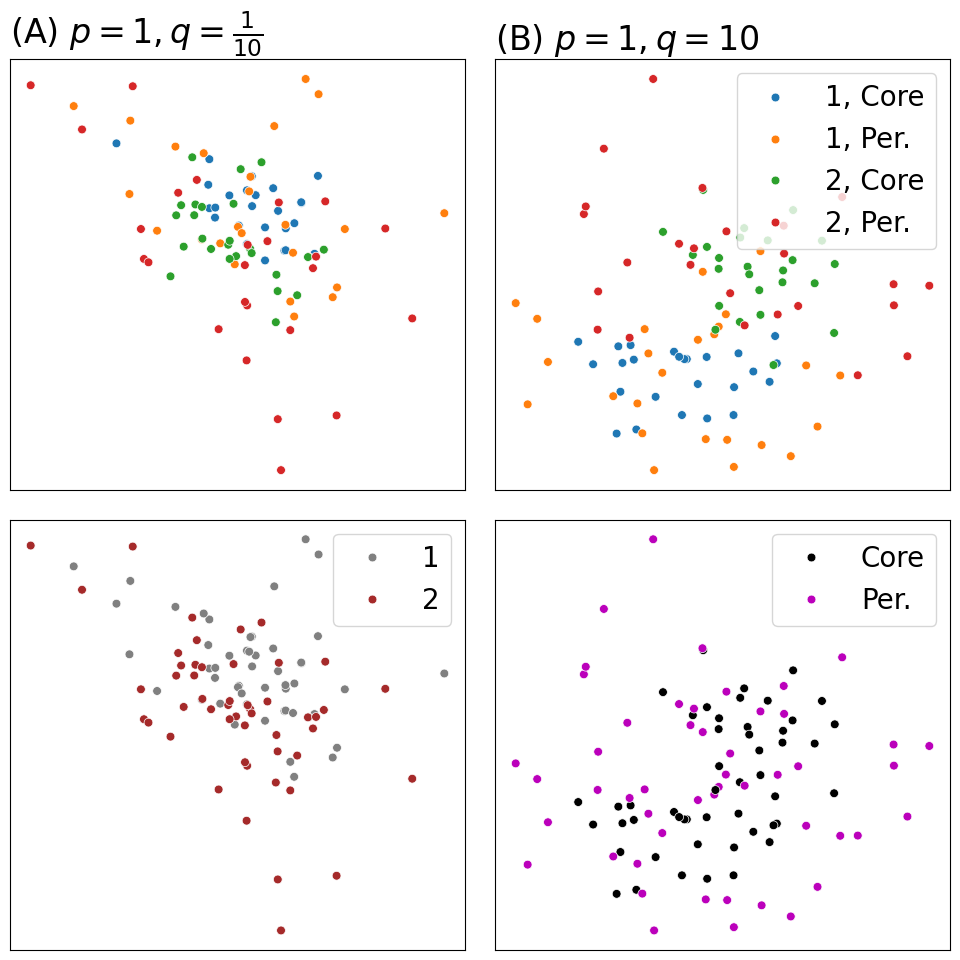

In [18]:
plot_latents(Xhat2, ax=axs[0][1], s=40, labels=zs_aug, title="(B) $p = 1, q = 10$")
# Remove x and y ticks
axs[0][1].set_xticks([])
axs[0][1].set_yticks([])

# Remove axis numbers
axs[0][1].set_xticklabels([])
axs[0][1].set_yticklabels([])


plot_latents(Xhat2, ax=axs[1][1], s=40, labels=zs_deg, title="", palette={"Core": "black",  "Per.": "#BB00BB"})
axs[1][1].set_xticks([])
axs[1][1].set_yticks([])

# Remove axis numbers
axs[1][1].set_xticklabels([])
axs[1][1].set_yticklabels([])

fig.tight_layout()

fname = "diff_pairplot"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

fig